# Preprocess long reads

1. Converting unaligned CRAM to FASTQ for Minimap2 aligment:

    ```bash
    samtools bam2fq -@ 32 -T 1 --reference ./ref/hg38.fna cram/uf_hembank_${ID}.pass.cram | \
    minimap2 -y -t 32 -ax lr:hq ref/hg38.fna - > sam/uf_hembank_${ID}.sam
    ```

2. Converting SAM to BAM, sorting, and indexing:

    ```bash
    samtools view -@ 32 -bS sam/uf_hembank_${ID}.sam | \
    samtools sort -@ 32 - --write-index -o bam/uf_hembank_${ID}.bam -O BAM --reference ref/hg38.fna
    ```

3. Creating a BedMethyl file with Modkit
    q
    ```bash
    modkit pileup bam/uf_hembank_${ID}.bam bed/uf_hembank_${ID}.bed -t 32 --combine-strands --cpg --ignore h --ref ref/hg38.fna
    ```

## Where data at?

In [1]:
import pandas as pd

mount = '/mnt/d/'

reference_path = mount + 'genome_references/Illumina_methylation_arrays/EPIC.hg38.manifest.tsv.gz'
output_path = '/mnt/c/Users/fmarc/OneDrive/Desktop/nanopore_processed/pacmap/'

sample_name = 'uf_hembank_1830'

## Create BED6 file to harmonize probes from EPIC array with nanopore

In [2]:
# # read df_discovery and df_validation
# df_discovery = pd.read_pickle(mount+'MethylScore_v2/Intermediate_Files/'+'3308samples_333059cpgs_withbatchcorrection_bvalues.pkl').sort_index().iloc[:,1:]

# array_reference = pd.read_csv("/mnt/c/Users/fmarc/OneDrive/Desktop/nanopore_processed/ref/EPIC.anno.GRCh38.tsv.gz", sep='\t', compression='gzip',
#                               usecols=['chrm','start','end','orientation', 'probeID']
#                               ).set_index('probeID').sort_index()

# pacmap_reference = array_reference.loc[df_discovery.columns].reset_index()

# # change values in `orientation` column to match the orientation of the probes in the discovery dataset
# pacmap_reference['orientation'] = pacmap_reference['orientation'].map({'down': '-', 'up': '+'})
# pacmap_reference['score'] = 0

# # Rename `IlmnID` to `name` to follow BED standard
# pacmap_reference = pacmap_reference.rename(columns={'IlmnID': 'name', 'orientation': 'strand'})

# # Order columns
# pacmap_reference = pacmap_reference[['chrm', 'start', 'end', 'name', 'score', 'strand', ]]

# # Sort by `chrm` and `start`
# pacmap_reference = pacmap_reference.sort_values(by=['chrm', 'start'])

# pacmap_reference.to_csv('../data/pacmap_reference.bed', sep='\t', index=False, header=False)

pacmap_reference = pd.read_csv('../data/pacmap_reference.bed', sep='\t', header=None, names=['chrm', 'start', 'end', 'name', 'score', 'strand'])
pacmap_reference

,chrm,start,end,name,score,strand
0,chr1,69590,69592,cg21870274,0,+
1,chr1,864702,864704,cg08258224,0,-
2,chr1,870160,870162,cg16619049,0,-
3,chr1,877158,877160,cg18147296,0,-
4,chr1,898802,898804,cg13938959,0,+
...,...,...,...,...,...,...
333053,chr9,138119084,138119086,cg00378292,0,+
333054,chr9,138120221,138120223,cg07982825,0,-
333055,chr9,138122338,138122340,cg14491707,0,+
333056,chr9,138122548,138122550,cg13811936,0,-


## Load modkit processed file

In [3]:

# Read the input data, skipping the first row if it's a header or irrelevant
df = pd.read_csv('/mnt/c/Users/fmarc/OneDrive/Desktop/nanopore_processed/bed/'+sample_name+'.bed', sep='\s+',
                 names=["chrom", "start_position","end_position","modified base code","score",
                        'strand' ,"start position","end position", "color", "Nvalid_cov",
                        "fraction modified", "Nmod", "Ncanonical", "Nother_mod", "Ndelete",
                        "Nfail", "Ndiff", "Nnocall"])

df

,chrom,start_position,end_position,modified base code,score,strand,start position,end position,color,Nvalid_cov,fraction modified,Nmod,Ncanonical,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall
0,chr1,10468,10469,m,16,.,10468,10469,"255,0,0",16,100.00,16,0,0,0,2,0,0
1,chr1,10470,10471,m,13,.,10470,10471,"255,0,0",13,100.00,13,0,0,1,3,1,0
2,chr1,10483,10484,m,13,.,10483,10484,"255,0,0",13,100.00,13,0,0,5,0,0,0
3,chr1,10488,10489,m,18,.,10488,10489,"255,0,0",18,100.00,18,0,0,0,0,0,0
4,chr1,10492,10493,m,17,.,10492,10493,"255,0,0",17,100.00,17,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29184784,chrUn_GL000218v1,160573,160574,m,43,.,160573,160574,"255,0,0",43,23.26,10,33,0,0,2,0,0
29184785,chrUn_GL000218v1,160611,160612,m,43,.,160611,160612,"255,0,0",43,62.79,27,16,0,0,2,0,0
29184786,chrUn_GL000218v1,160669,160670,m,39,.,160669,160670,"255,0,0",39,41.03,16,23,0,0,2,4,0
29184787,chrUn_GL000218v1,160790,160791,m,43,.,160790,160791,"255,0,0",43,44.19,19,24,0,0,0,0,0


## Plot distributions

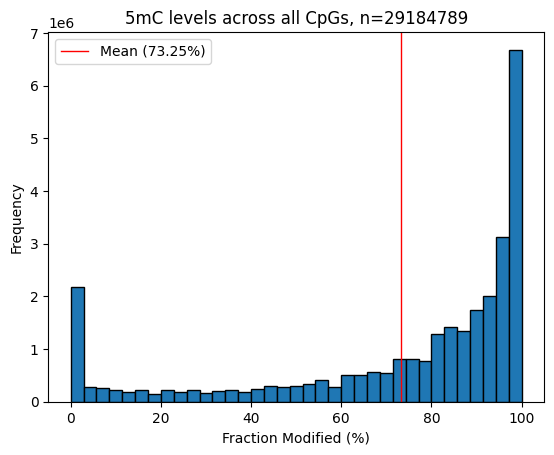

In [4]:
import matplotlib.pyplot as plt

# Create histogram for fraction_modified
plt.hist(df['fraction modified'], bins=35, edgecolor='black')
plt.title('5mC levels across all CpGs, n=' + str(df.shape[0]))
plt.xlabel('Fraction Modified (%)')
plt.ylabel('Frequency')
# add a vertical line at the mean
plt.axvline(df['fraction modified'].mean(), color='red',
            linewidth=1, label='Mean ('+ str(round(df['fraction modified'].mean(), 2)) + '%)')
plt.legend()
plt.show()

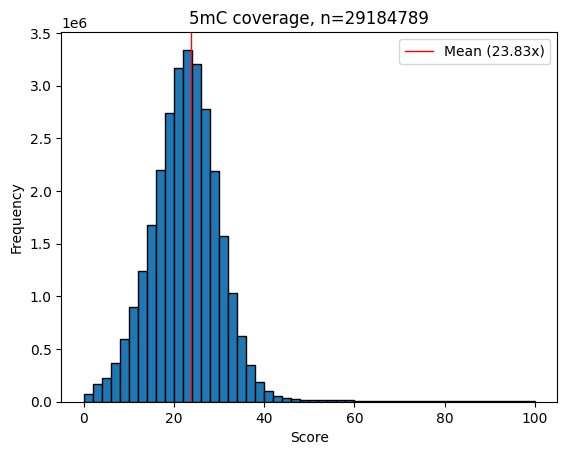

In [5]:
# create histogram of `score` for both 5mC and 5hmC, ignoring outliers
plt.hist(df['score'], bins=50, edgecolor='black', range=(0, 100))
plt.title('5mC coverage, n=' + str(df.shape[0]))
plt.xlabel('Score')
plt.ylabel('Frequency')
# add mean line
plt.axvline(df['score'].mean(), color='red', linewidth=1, label='Mean ('+ str(round(df['score'].mean(), 2)) + 'x)')
plt.legend()
plt.show()

## Index genomic coordinates for both files

In [6]:

# Create 'coordinate' column for merging
df['coordinate'] = df['chrom'].astype(str) + ':' + df['start_position'].astype(str)

df_filtered = df[df['modified base code'].isin(['m'])].set_index('coordinate')

pacmap_reference['coordinate'] = pacmap_reference['chrm'].astype(str) + ':' + pacmap_reference['start'].astype(str)
pacmap_reference = pacmap_reference.set_index('coordinate')

df_merged = pacmap_reference[['name']].join(df_filtered, how='inner')

# Transform the fraction modified into beta values
df_merged.loc[:, sample_name] = (df_merged['fraction modified'] / 100).round(3)

df_merged

,name,chrom,start_position,end_position,modified base code,score,strand,start position,end position,color,Nvalid_cov,fraction modified,Nmod,Ncanonical,Nother_mod,Ndelete,Nfail,Ndiff,Nnocall,uf_hembank_1830
coordinate,,,,,,,,,,,,,,,,,,,,
chr10:100008150,cg19212550,chr10,100008150,100008151,m,32,.,100008150,100008151,"255,0,0",32,81.25,26,6,0,0,6,0,0,0.812
chr10:100008943,cg14405603,chr10,100008943,100008944,m,29,.,100008943,100008944,"255,0,0",29,75.86,22,7,0,0,3,1,0,0.759
chr10:100009525,cg18561930,chr10,100009525,100009526,m,27,.,100009525,100009526,"255,0,0",27,0.00,0,27,0,0,9,0,0,0.000
chr10:100010213,cg16423650,chr10,100010213,100010214,m,28,.,100010213,100010214,"255,0,0",28,0.00,0,28,0,0,7,0,0,0.000
chr10:100010332,cg27096759,chr10,100010332,100010333,m,29,.,100010332,100010333,"255,0,0",29,0.00,0,29,0,0,3,1,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr9:99907189,cg22304376,chr9,99907189,99907190,m,12,.,99907189,99907190,"255,0,0",12,0.00,0,12,0,0,8,0,0,0.000
chr9:99907330,cg14153061,chr9,99907330,99907331,m,19,.,99907330,99907331,"255,0,0",19,5.26,1,18,0,0,0,0,0,0.053
chr9:99909385,cg13422870,chr9,99909385,99909386,m,22,.,99909385,99909386,"255,0,0",22,95.45,21,1,0,0,1,0,0,0.954


## Adjust to fit PaCMAP input format

In [7]:

# Calculate the fraction modified and prepare the final DataFrame
df_merged.loc[:, sample_name] = (df_merged['fraction modified'] / 100).round(3)

df_processed = df_merged[['name', sample_name]].set_index('name').T

# sort columns
df_processed = df_processed.sort_index(axis=1)

df_processed

name,cg00000109,cg00000236,cg00000292,cg00000363,cg00000622,cg00000658,cg00000714,cg00000721,cg00000734,cg00000769,...,cg27665648,cg27665659,cg27665715,cg27665767,cg27665769,cg27665860,cg27665925,cg27665985,cg27666046,cg27666123
uf_hembank_1830,0.96,0.5,0.615,0.294,0.0,1.0,0.0,1.0,0.0,0.0,...,0.773,0.333,1.0,0.548,0.0,1.0,0.0,0.294,0.454,0.727


## Save results

In [8]:
# Save the final DataFrame
df_processed.to_pickle(output_path + sample_name + '_pacmap_bvalues.pkl')

# Print path to the final DataFrame
print(output_path + sample_name + '_pacmap_bvalues.pkl')

/mnt/c/Users/fmarc/OneDrive/Desktop/nanopore_processed/pacmap/uf_hembank_1830_pacmap_bvalues.pkl


## Appendix 1. Retrospective lower coverage analysis

```bash
samtools view -@ 32 -bh -s ${subsampling_fraction} bam/uf_hembank_${ID}.bam > bam/subsampled_${ID}_01x.bam
```